# Linear Regression

Given the data that we have, we know that Linear Regresion isn't a good fit for predicting the demand of hourly bikesharing rentals. We see it as an advantage to use the linear regression model as a prediction baseline that we can later compare other results to. 
We fit the model to use mean squared error, mean absolute error, mean absolute percentage error and root mean squared error as a reference to check how good the other models are performing. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

We use the data that we prepared in our feature engineering.

In [2]:
df_bike_trips_hourly = pd.read_parquet('../../data/bike_trips_hourly_FINAL.parquet')
df_bike_trips_hourly.head()

,starting_trips,Most_Occuring_Starting_Neighborhood,min_temp,precip,hour,month,is_weekday,season,is_holiday
index,,,,,,,,,
2016-01-01 00:00:00,26.0,109,6.7,0.0,0,1,1,4,1
2016-01-01 01:00:00,39.0,112,7.2,0.0,1,1,1,4,1
2016-01-01 02:00:00,33.0,87,6.7,0.0,2,1,1,4,1
2016-01-01 03:00:00,6.0,116,6.7,0.0,3,1,1,4,1
2016-01-01 04:00:00,1.0,104,6.1,0.0,4,1,1,4,1


## Define X and Y

We split our data into X and Y as follows: We use 'starting_trips' as our Y value for the prediction. The other features (without starting_trips) are assigned to X. Further we standardize the data of X so the variables are centered and have the mean 0. 

In [3]:
X = df_bike_trips_hourly.drop(['starting_trips'], axis=1)
X_sds = StandardScaler().fit_transform(X)
Y = df_bike_trips_hourly['starting_trips']

## Train the model on the training set

We use a 30/70 split, so that 30% of the data is used for testing and 70% for training the model.

In [4]:
#random_state = 0, so we get the same train and test sets across different executions
#30-70 split 
X_train, X_test, Y_train, Y_test = train_test_split(X_sds, Y, test_size = 0.3, random_state = 0)

In [5]:
regression = LinearRegression().fit(X_train, Y_train)


## Predict the test set results

In [6]:
Y_pred = regression.predict(X_test)
print(Y_pred)

[-11.00237577  84.9843196   13.38297031 ...  47.32129401  50.36589186
 101.59485097]


Next we print the coefficient values. The values represent the change in the outcome when the input feature increases by one unit. 
For example, if the hour increases by one unit the demand will increase by 20.72883866. 

In [7]:
regression.coef_

array([10.67040083, 18.12598671, -6.18675961, 20.72883866, 12.95337395,
        7.26997548, -4.49244524, -2.03954775])

## Evaluate the model

We print out the values of the chosen evaluation metrics for the linear regression, where it can be seen that the linear regression doesn't perform well, as we expected. E.g. R^2 indicates how well the independent variables are suited to explain the variance of the dependent ones. In our case a R-squared value of 0.28 means that 28% of the total variation in the target variable can be explained by the input features of the model. Looking at the other metrics it can be seen that they perform poorly too. 

In [8]:
print(f"MAE: {mean_absolute_error(Y_test, Y_pred):.2f}")
print(f"MSE: {mean_squared_error(Y_test, Y_pred):.2f}")
print(f"MAPE: {(mean_absolute_error(Y_test, Y_pred) / Y_test.mean()) * 100:.2f}%")
print(f"RMSE: {mean_squared_error(Y_test, Y_pred, squared=False):.2f}")
print(f"R^2: { r2_score(Y_test, Y_pred):.2f}")

MAE: 46.21
MSE: 3846.86
MAPE: 60.69%
RMSE: 62.02
R^2: 0.28


## Plot the results

We wanted to show a visualization of the linear regression. Here we can see how i.e. the outliers are not portrayed well.

Text(0, 0.5, 'Predicted')

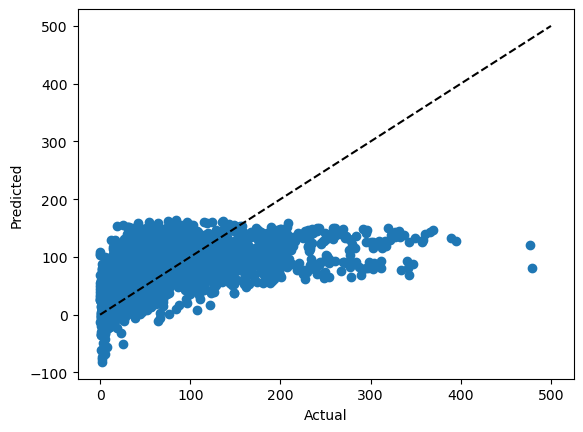

In [15]:
# Create a scatterplot of the actual and predicted values for the test data
plt.scatter(Y_test, Y_pred)

# Plot the line y=x as a reference
min_val = 0
max_val = 500
plt.plot([min_val, max_val], [min_val, max_val], 'k--')

plt.xlabel('Actual')
plt.ylabel('Predicted')

# One way to validate the predictions made by a machine learning model is to
# compare the predicted values to the actual values on a plot.
# If the model is performing well, the points on the
# scatterplot should be close to the line y=x, which indicates a good fit. If the
# points are widely scattered or form a non-linear pattern, this may indicate
# that the model is not performing well and that the predictions may not be
# accurate.